In [ ]:
# importar as bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o algoritmo K-Means:
from sklearn.cluster import KMeans

# Métrica de avaliação para modelos de clustering:
from sklearn.metrics import silhouette_score

# O pacote warnings inibe a visualização de avisos nos outputs do Colab.
import warnings
warnings.filterwarnings('ignore')

# importando a fórmula que transforma object em tipo número e para normalização dos dados
from sklearn.preprocessing import LabelEncoder, StandardScaler

# importando o PCA para reduzir os números de atributos
from sklearn.decomposition import PCA


# Parte 1: Redução de dimensionalidade com PCA

In [ ]:
# carregando dataframe
df = pd.read_csv('/content/household_power_consumption.csv', sep=';')

# retirando dados NaN e selecionando 5% de amostra de forma aleatória
df = df.dropna().sample(52430)

In [ ]:
#transformando os dados em tipo numérico
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = LabelEncoder().fit_transform(df[col])

df.info()

# Normalizando as colunas numéricas
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['float', 'int']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52430 entries, 725775 to 937392
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   52430 non-null  int64  
 1   Time                   52430 non-null  int64  
 2   Global_active_power    52430 non-null  int64  
 3   Global_reactive_power  52430 non-null  int64  
 4   Voltage                52430 non-null  int64  
 5   Global_intensity       52430 non-null  int64  
 6   Sub_metering_1         52430 non-null  int64  
 7   Sub_metering_2         52430 non-null  int64  
 8   Sub_metering_3         52430 non-null  float64
dtypes: float64(1), int64(8)
memory usage: 4.0 MB
<class 'pandas.core.frame.DataFrame'>
Index: 52430 entries, 725775 to 937392
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   52430 non-null  float64
 1  

In [ ]:
# reduzindo os dados com PCA
pca = PCA(n_components=5)
df_reduced = pca.fit_transform(df)
df_reduced.shape

# Verificando o quanto os novos dados explica dos dados originais
explained_variance = pca.explained_variance_ratio_.sum()
print(f"A variância dos novos dados explica {explained_variance * 100:.2f}% dos dados originais.")

A variância dos novos dados explica 76.01% dos dados originais.


# Parte 2: Agrupamento (Clustering) com K-Means

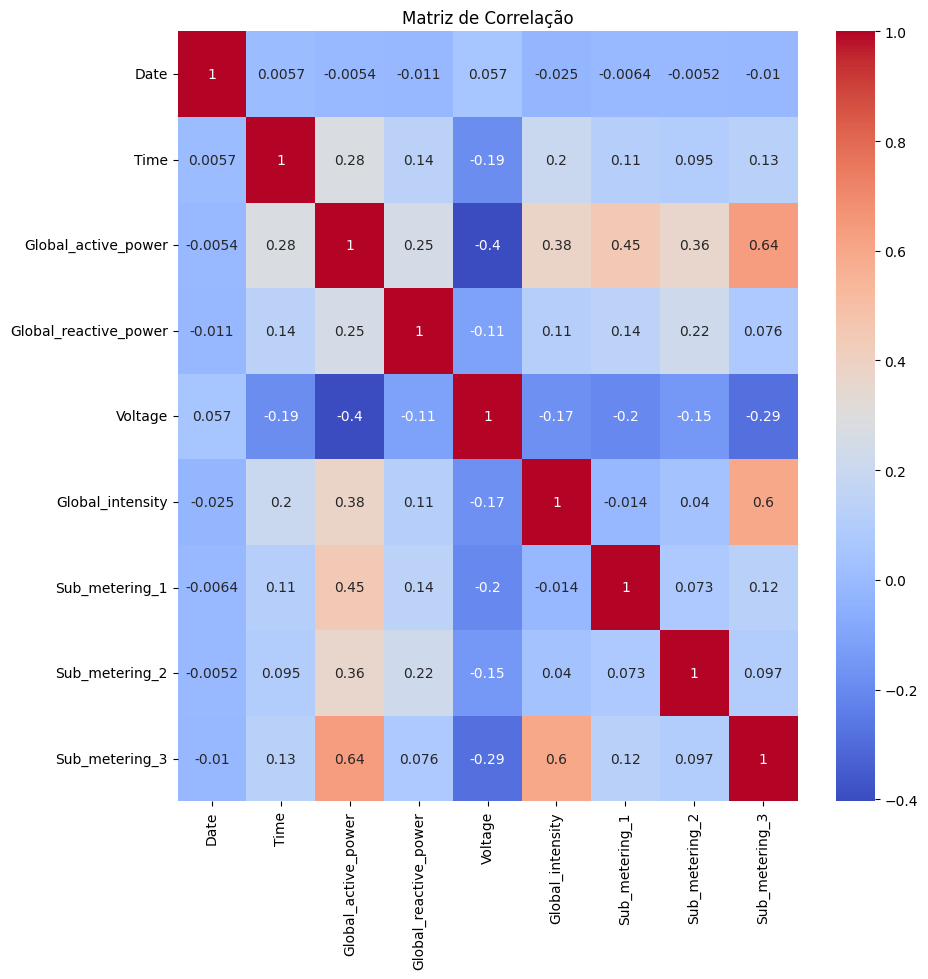

In [ ]:
# escolhendo os atributos necessários para técnica de agrupamento

# Calcula a matriz de correlação
corr = df.corr()

# Plota a matriz de correlação como um heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

Usamos as colunas abaixo pois elas tem uma corelação moderadas entre elas:
*   "Global_active_power";
*   "Global_reactive_power";
*   "Voltage";
*   "Global_intensity";
*   "Sub_metering_3"



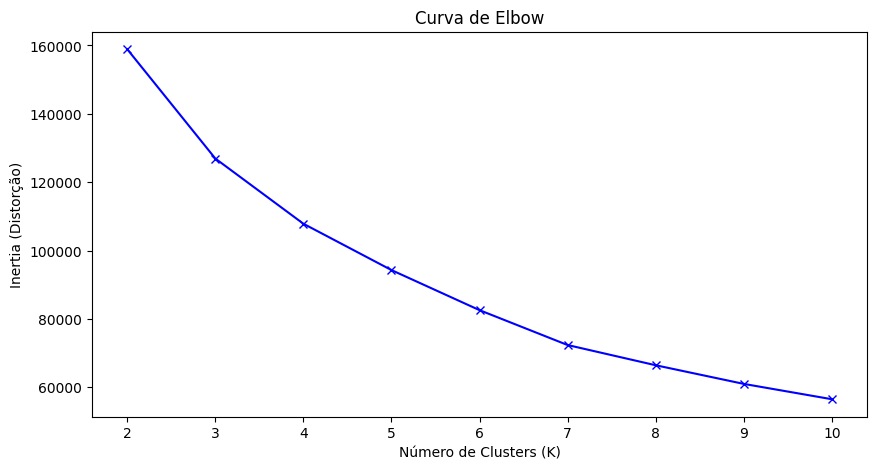

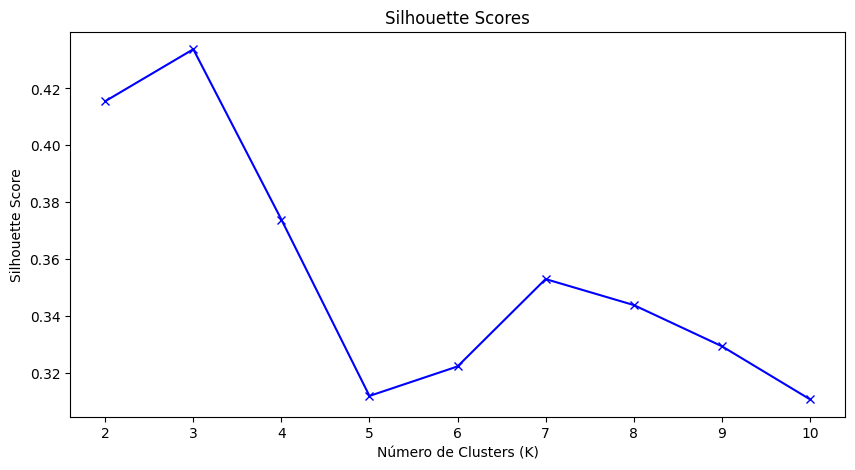

In [ ]:
df_cor = df[["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity", "Sub_metering_3"]]

# Lista para armazenar as inertias (distorções)
inertias = []

# Lista para armazenar os silhouette scores
silhouette_scores = []

# Range de valores de K para testar
k_values = range(2, 11)

# Loop para testar diferentes valores de K
for k in k_values:
  # Cria o modelo K-Means com o valor atual de K
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

  # Aplica o modelo aos dados
  kmeans.fit(df_cor)

  # Armazena a inertia (distorção)
  inertias.append(kmeans.inertia_)

  # Calcula e armazena o silhouette score
  if k > 1:
    silhouette_scores.append(silhouette_score(df_cor, kmeans.labels_))

# Plota a curva de Elbow
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertias, '-bx')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inertia (Distorção)')
plt.title('Curva de Elbow')
plt.show()

# Plota os silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, '-bx')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.show()


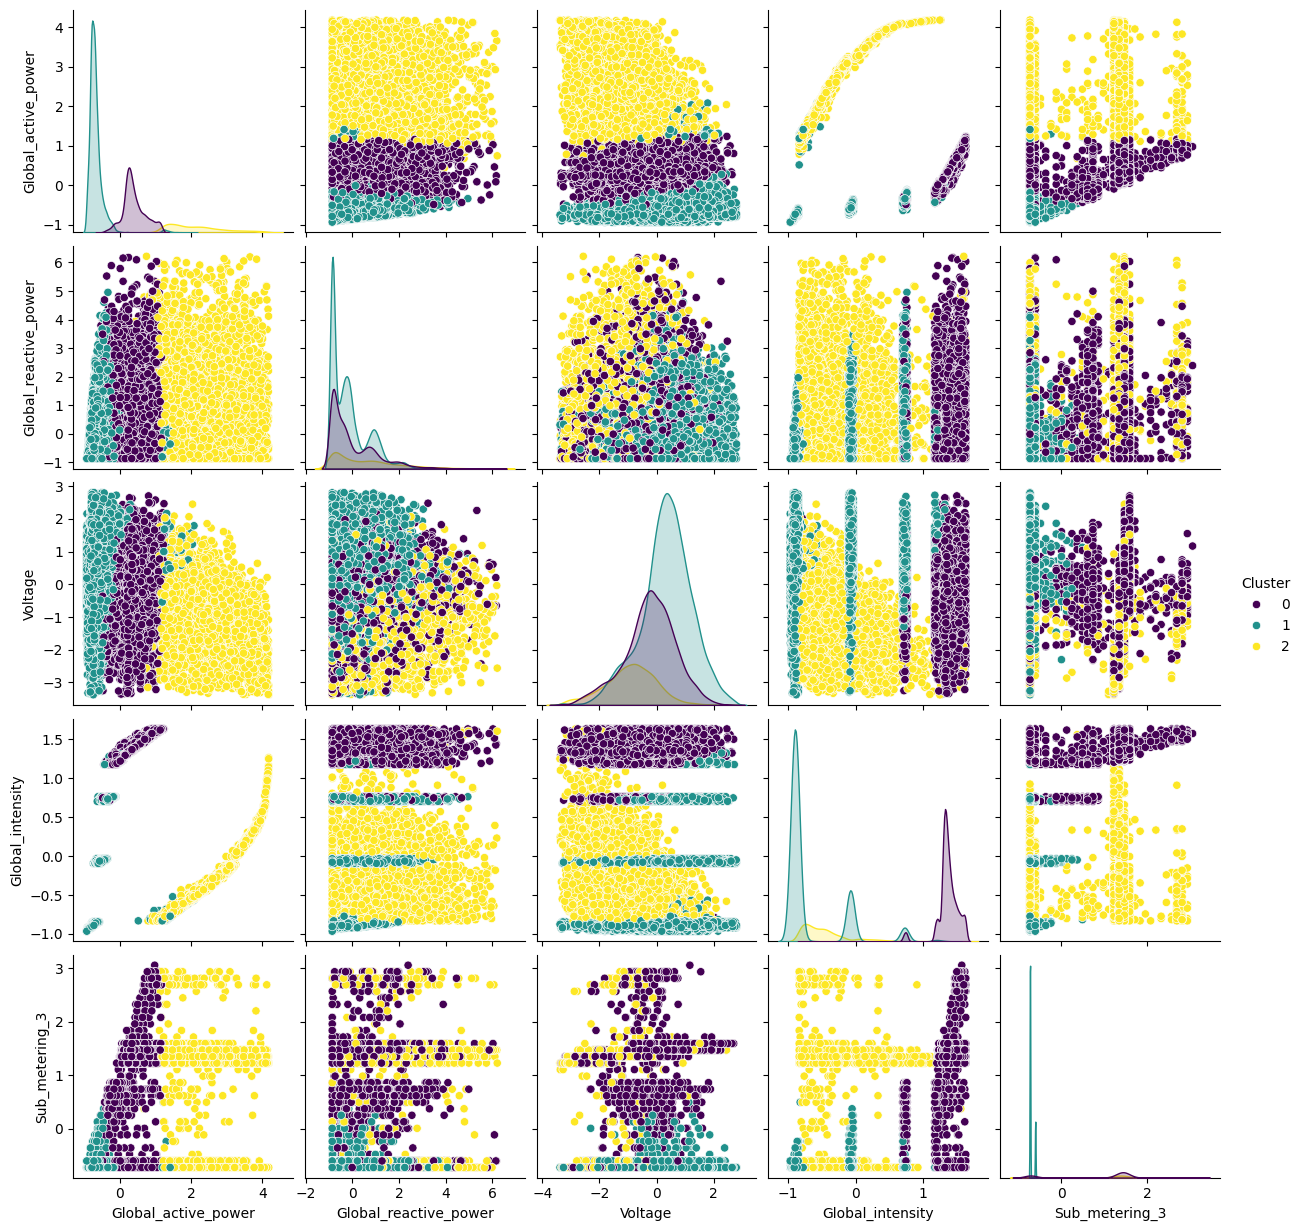

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_cor)

# Obtém os labels dos clusters
labels = kmeans.labels_

# Adiciona os labels ao DataFrame original
df_cor['Cluster'] = labels

# Plota os clusters usando gráficos de dispersão
sns.pairplot(df_cor, hue='Cluster', palette='viridis')
plt.show()
